Impoting the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data

In [3]:
df = pd.read_csv("./data/final_vg.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113
...,...,...,...,...,...,...,...,...,...,...,...
16647,7925,Zumba Fitness Rush,X360,2012.0,Sports,505 Games,4.409308,3.167419,4.168474,1.087977,13.053204
16648,6279,Zumba Fitness: World Party,Wii,2013.0,Misc,Majesco Entertainment,3.033887,2.792725,1.596852,1.493442,8.878837
16649,6977,Zumba Fitness: World Party,XOne,2013.0,Misc,Majesco Entertainment,3.228043,2.004268,1.833151,1.087977,7.954274
16650,15422,Zwei!!,PSP,2008.0,Role-Playing,Falcom Corporation,1.087977,0.592445,1.087977,0.394830,3.509168


Getting to know the data

In [5]:
df.shape

(16652, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16652 entries, 0 to 16651
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16652 non-null  int64  
 1   Name          16652 non-null  object 
 2   Platform      16652 non-null  object 
 3   Year          16381 non-null  float64
 4   Genre         16652 non-null  object 
 5   Publisher     16594 non-null  object 
 6   NA_Sales      16652 non-null  float64
 7   EU_Sales      16652 non-null  float64
 8   JP_Sales      16652 non-null  float64
 9   Other_Sales   16652 non-null  float64
 10  Global_Sales  16652 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


how many nulls are present

In [11]:
df.isnull().sum()


Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.016274
Genre           0.000000
Publisher       0.003483
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [12]:
100*(df.isnull().sum())/df.shape[0]

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.627432
Genre           0.000000
Publisher       0.348307
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

since the nulls is very small percent of the whole data, we can drop them

In [13]:
df_final = df.dropna(axis= 0, how= "any")

In [14]:
df_final.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Univariate analysis

which genre is the most popular

In [17]:
cat_count = df["Genre"].value_counts()

In [21]:
x_bar = cat_count.index
y_bar =  cat_count


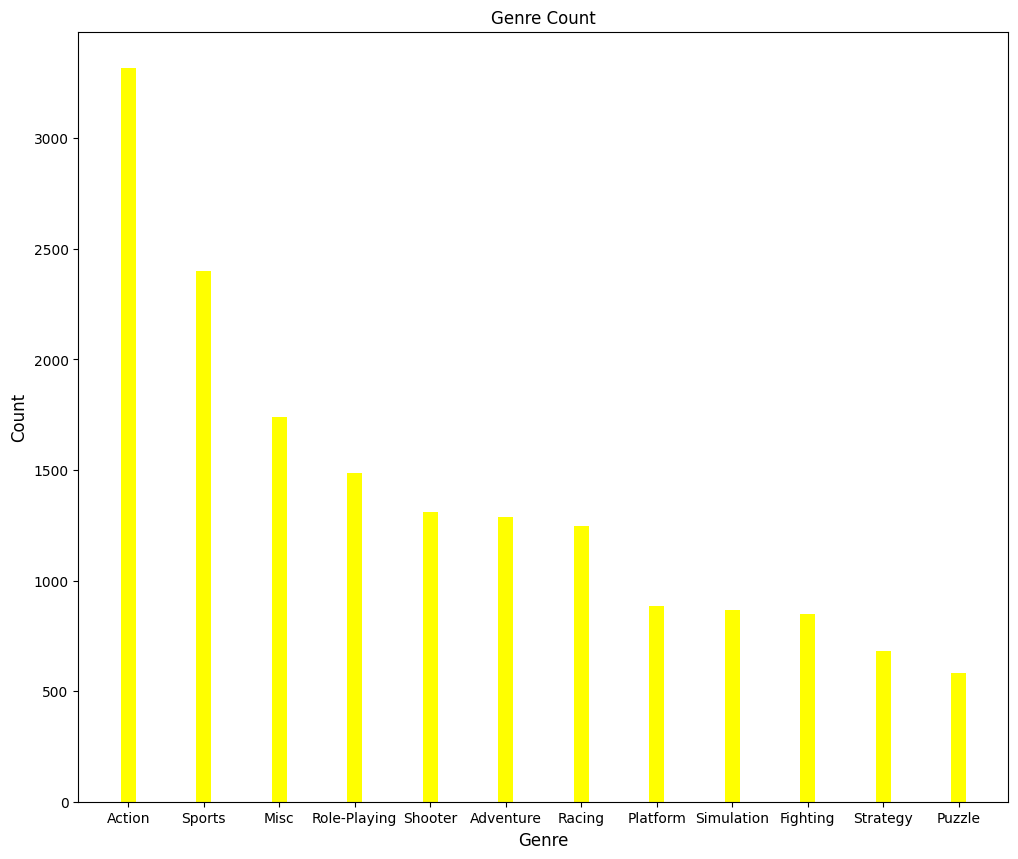

In [30]:
plt.figure(figsize= (12,10))
plt.bar(x_bar, y_bar, width= 0.2, color = "yellow")
plt.title("Genre Count")
plt.xlabel("Genre", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

making the same chart using seaborn

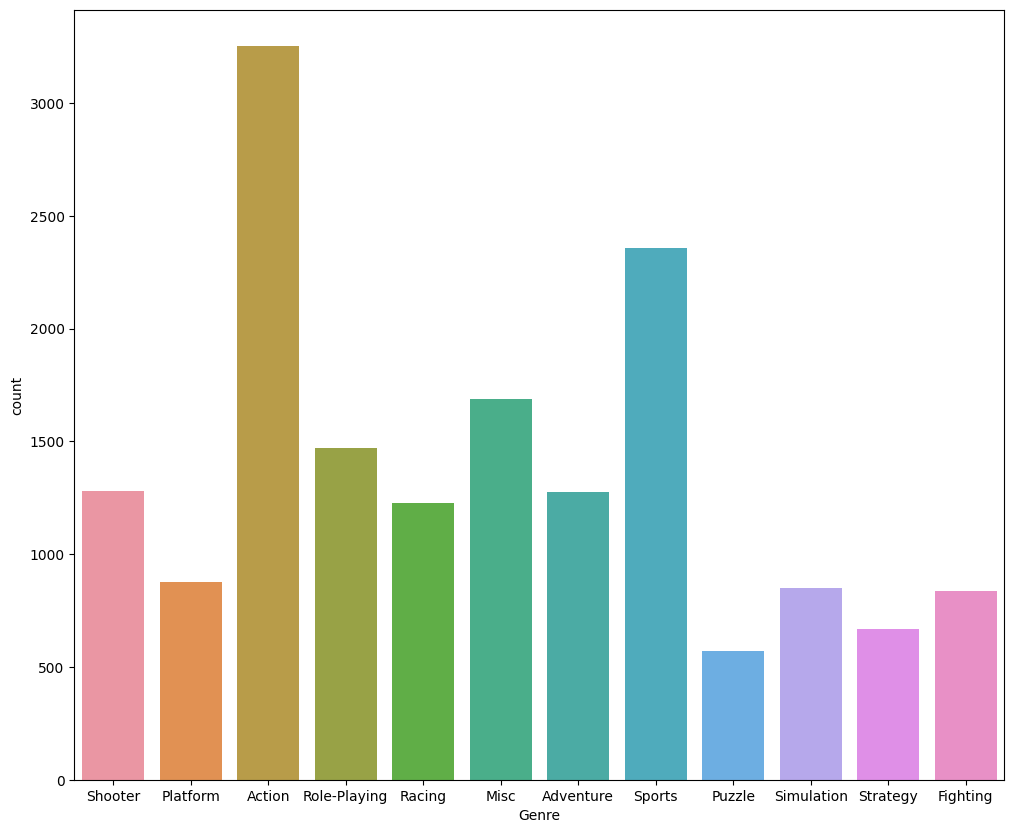

In [35]:
plt.figure(figsize= (12,10))
sns.countplot(x = df_final["Genre"])
plt.show()

Lets see how many games were released per year

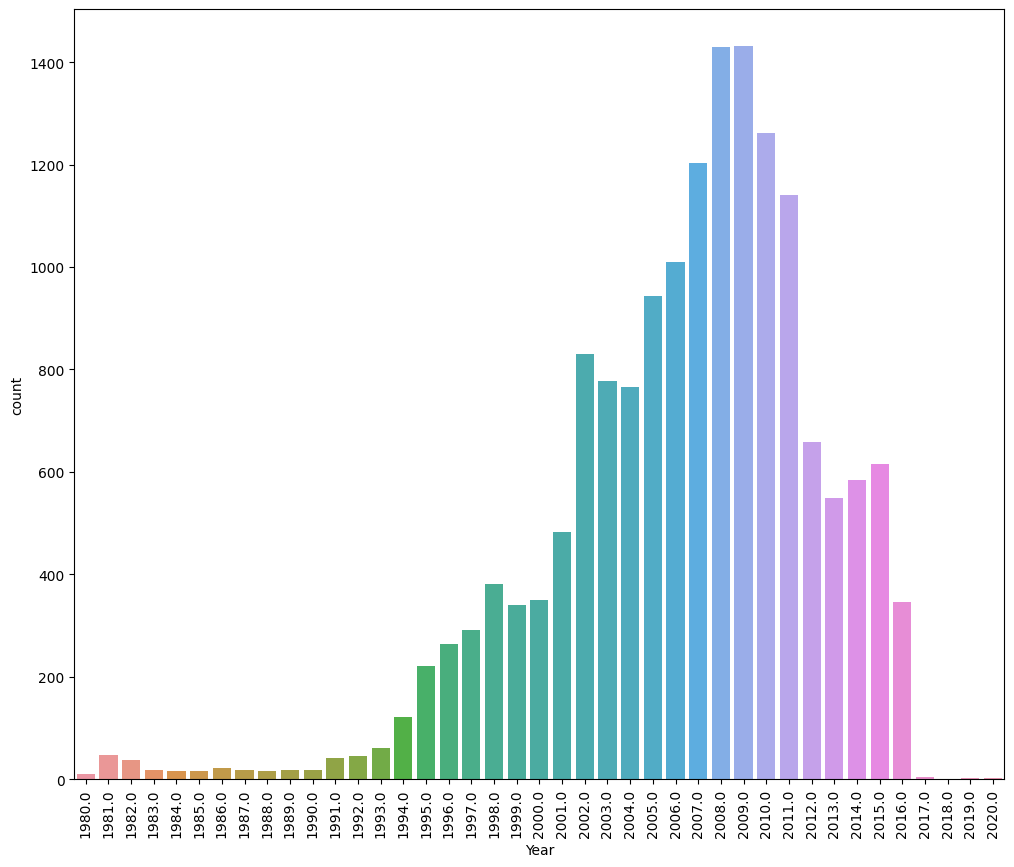

In [39]:
plt.figure(figsize=(12,10))

sns.countplot( x = df["Year"])
plt.xticks(rotation = 90)
plt.show()


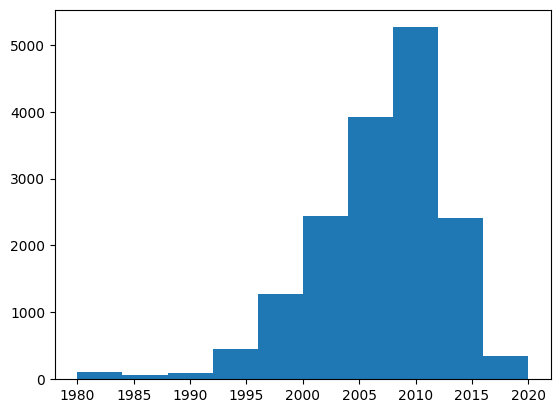

In [40]:
plt.hist(df["Year"])
plt.show()

In [43]:
df_final["Name"].value_counts()

Name
Ice Hockey                                       41
Baseball                                         17
Need for Speed: Most Wanted                      12
FIFA 14                                           9
LEGO Marvel Super Heroes                          9
                                                 ..
inFAMOUS: Second Son                              1
Infected                                          1
Infernal: Hell's Vengeance                        1
Infinite Space                                    1
Zyuden Sentai Kyoryuger: Game de Gaburincho!!     1
Name: count, Length: 11325, dtype: int64

trend in Sales 

In [44]:
df_final.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

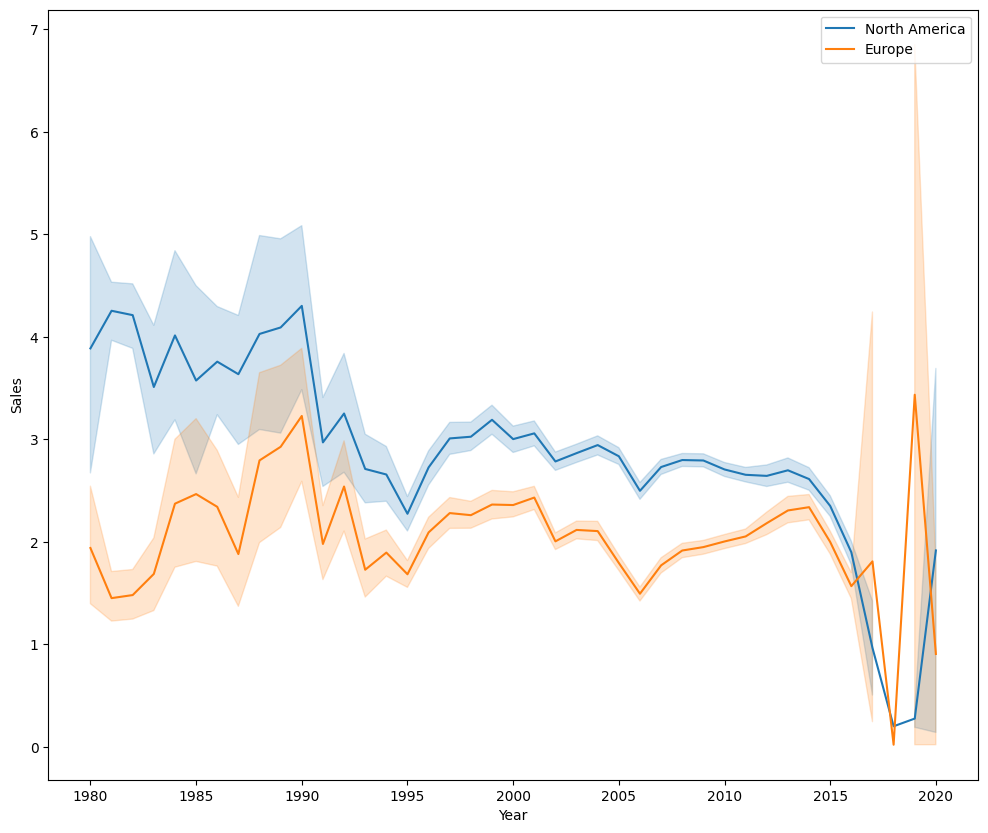

In [51]:
plt.figure(figsize= (12,10))
sns.lineplot( data= df_final, x= "Year", y= "NA_Sales", label = "North America")
sns.lineplot( data= df_final, x= "Year", y= "EU_Sales", label = "Europe")
plt.ylabel("Sales")
plt.show()